In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [2]:
tf.debugging.set_log_device_placement(True)

# Place tensors on the CPU
with tf.device('/CPU:0'):
  a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
  b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])

# Run on the GPU
c = tf.matmul(a, b)
print(c)

Executing op _MklMatMul in device /job:localhost/replica:0/task:0/device:CPU:0
tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Настройки для красивых графиков
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
# Увеличим стандартный размер графиков
plt.rcParams['figure.figsize'] = (15, 7)

In [2]:
# Определяем пути к данным. Предполагается, что ноутбук в папке `notebooks`
# и данные лежат в `data/raw/` относительно корня проекта.
# Если структура другая, поправьте пути.
try:
    candles_path = '../data/raw/train_candles.csv'
    if not os.path.exists(candles_path):
        # Альтернативный путь, если запускаем из корня проекта
        candles_path = 'data/raw/train_candles.csv'
        
    df_candles = pd.read_csv(candles_path)
    # Сразу преобразуем дату в нужный формат
    df_candles['begin'] = pd.to_datetime(df_candles['begin'])
    print("Данные о свечах успешно загружены.")
except FileNotFoundError:
    print(f"Ошибка: Файл {candles_path} не найден. Проверьте путь к данным.")

df_candles.info()

Данные о свечах успешно загружены.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23118 entries, 0 to 23117
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   open                  23118 non-null  float64       
 1   close                 23118 non-null  float64       
 2   high                  23118 non-null  float64       
 3   low                   23118 non-null  float64       
 4   volume                23118 non-null  int64         
 5   begin                 23118 non-null  datetime64[ns]
 6   ticker                23118 non-null  object        
 7   target_return_1d      23118 non-null  float64       
 8   target_direction_1d   23118 non-null  int64         
 9   target_return_20d     23118 non-null  float64       
 10  target_direction_20d  23118 non-null  int64         
dtypes: datetime64[ns](1), float64(6), int64(3), object(1)
memory usage: 1.9+ MB


In [3]:
print("Первые 5 строк данных:")
display(df_candles.head())

print("\nОсновные статистические показатели:")
# Описываем только числовые колонки
display(df_candles.describe())

print(f"\nКоличество пропущенных значений в каждой колонке:\n{df_candles.isnull().sum()}")

Первые 5 строк данных:


,open,close,high,low,volume,begin,ticker,target_return_1d,target_direction_1d,target_return_20d,target_direction_20d
0,81.50,81.70,83.20,81.16,29755530,2020-06-19,AFLT,0.004896,1,0.071726,1
1,81.72,82.10,83.98,80.26,18502950,2020-06-22,AFLT,-0.010962,0,0.048477,1
2,82.04,81.20,82.48,80.40,16848930,2020-06-23,AFLT,-0.007635,0,0.048522,1
3,79.78,80.58,80.80,78.22,21559860,2020-06-25,AFLT,-0.014892,0,0.096550,1
4,80.50,79.38,81.44,78.76,14677280,2020-06-26,AFLT,0.044344,1,0.104056,1



Основные статистические показатели:


,open,close,high,low,volume,begin,target_return_1d,target_direction_1d,target_return_20d,target_direction_20d
count,23118.000000,23118.000000,23118.000000,23118.000000,2.311800e+04,23118,23118.000000,23118.000000,23118.000000,23118.000000
mean,1404.472617,1403.720216,1423.288621,1382.346488,3.538146e+09,2022-11-29 01:15:55.826628608,0.000349,0.493209,0.007303,0.521498
min,21.900000,22.440000,23.280000,21.440000,2.231000e+03,2020-06-19 00:00:00,-0.412538,0.000000,-0.610849,0.000000
25%,116.643750,116.550000,118.135000,114.821250,5.073948e+05,2021-08-31 00:00:00,-0.009611,0.000000,-0.047851,0.000000
50%,311.130000,311.325000,314.700000,308.015000,2.971295e+06,2022-12-08 00:00:00,-0.000053,0.000000,0.004649,1.000000
75%,1471.625000,1471.750000,1492.300000,1449.550000,1.806571e+07,2024-02-19 00:00:00,0.010092,1.000000,0.064566,1.000000
max,9000.000000,8908.000000,10097.000000,8500.000000,7.032681e+11,2025-04-15 00:00:00,0.333715,1.000000,0.644453,1.000000
std,2102.364091,2101.089076,2129.177425,2070.888711,2.413245e+10,NaN,0.022941,0.499965,0.103259,0.499548



Количество пропущенных значений в каждой колонке:
open                    0
close                   0
high                    0
low                     0
volume                  0
begin                   0
ticker                  0
target_return_1d        0
target_direction_1d     0
target_return_20d       0
target_direction_20d    0
dtype: int64


Всего уникальных тикеров: 19

Глубина истории по тикерам:


,min,max,count
ticker,,,
AFLT,2020-06-19,2025-04-15,1219
ALRS,2020-06-19,2025-04-15,1219
CHMF,2020-06-19,2025-04-15,1219
GAZP,2020-06-19,2025-04-15,1219
LKOH,2020-06-19,2025-04-15,1219
MAGN,2020-06-19,2025-04-15,1219
MGNT,2020-06-19,2025-04-15,1219
MTSS,2020-06-19,2025-04-15,1219
MOEX,2020-06-19,2025-04-15,1219


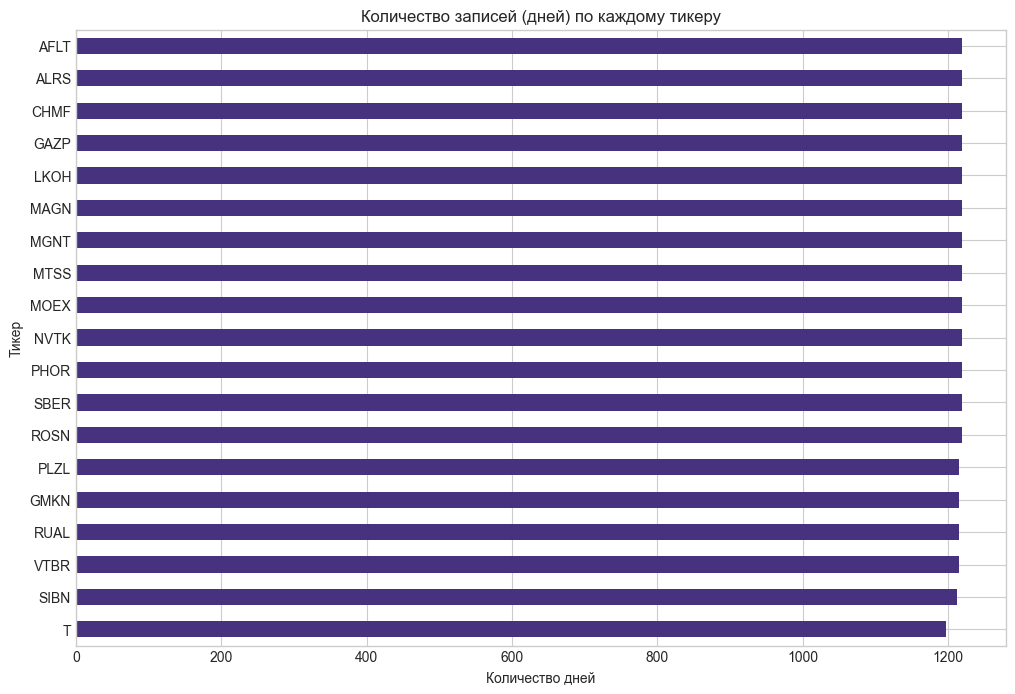

In [4]:
ticker_counts = df_candles['ticker'].value_counts()
print(f"Всего уникальных тикеров: {len(ticker_counts)}")

# Анализ глубины истории по каждому тикеру
ticker_history = df_candles.groupby('ticker')['begin'].agg(['min', 'max', 'count']).sort_values(by='count', ascending=False)

print("\nГлубина истории по тикерам:")
display(ticker_history)

# Визуализация количества записей по тикерам
plt.figure(figsize=(12, 8))
ticker_counts.plot(kind='barh')
plt.title('Количество записей (дней) по каждому тикеру')
plt.xlabel('Количество дней')
plt.ylabel('Тикер')
plt.gca().invert_yaxis() # Самый длинный тикер сверху
plt.show()

Визуализируем ряды цен закрытия для: ['AFLT', 'ALRS', 'CHMF', 'SIBN', 'T']


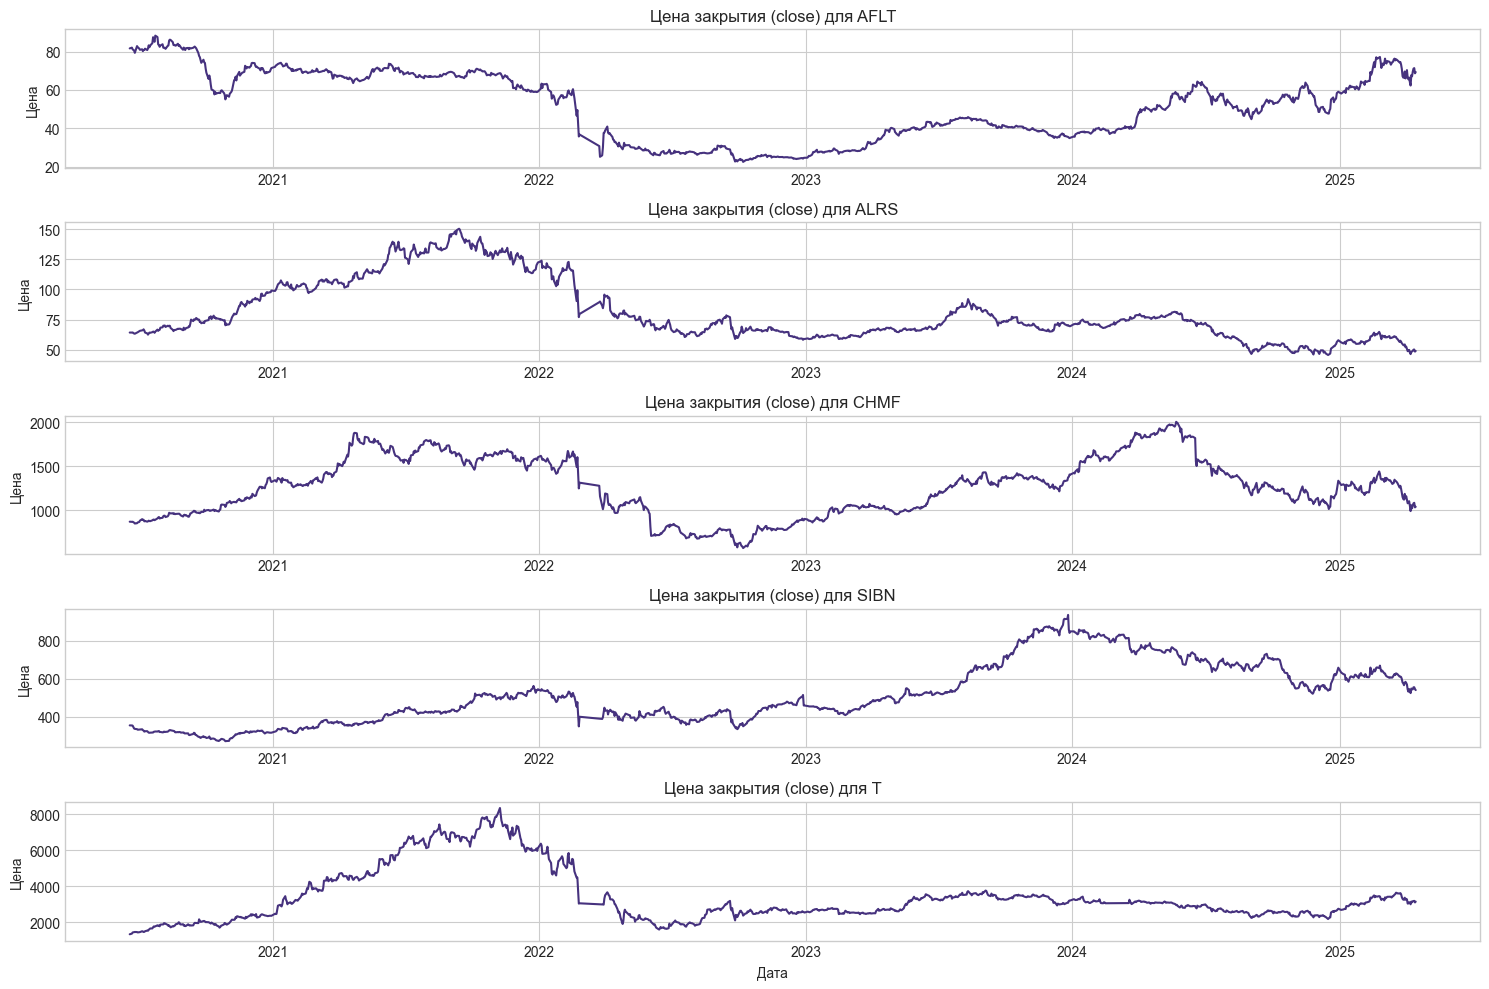

In [5]:
# Выберем несколько тикеров для визуализации (самые популярные и несколько менее популярных)
tickers_to_plot = ticker_history.head(3).index.tolist() + ticker_history.tail(2).index.tolist()

print(f"Визуализируем ряды цен закрытия для: {tickers_to_plot}")

plt.figure(figsize=(15, 10))
for i, ticker in enumerate(tickers_to_plot, 1):
    plt.subplot(len(tickers_to_plot), 1, i)
    subset = df_candles[df_candles['ticker'] == ticker]
    plt.plot(subset['begin'], subset['close'])
    plt.title(f'Цена закрытия (close) для {ticker}')
    plt.ylabel('Цена')
plt.xlabel('Дата')
plt.tight_layout()
plt.show()

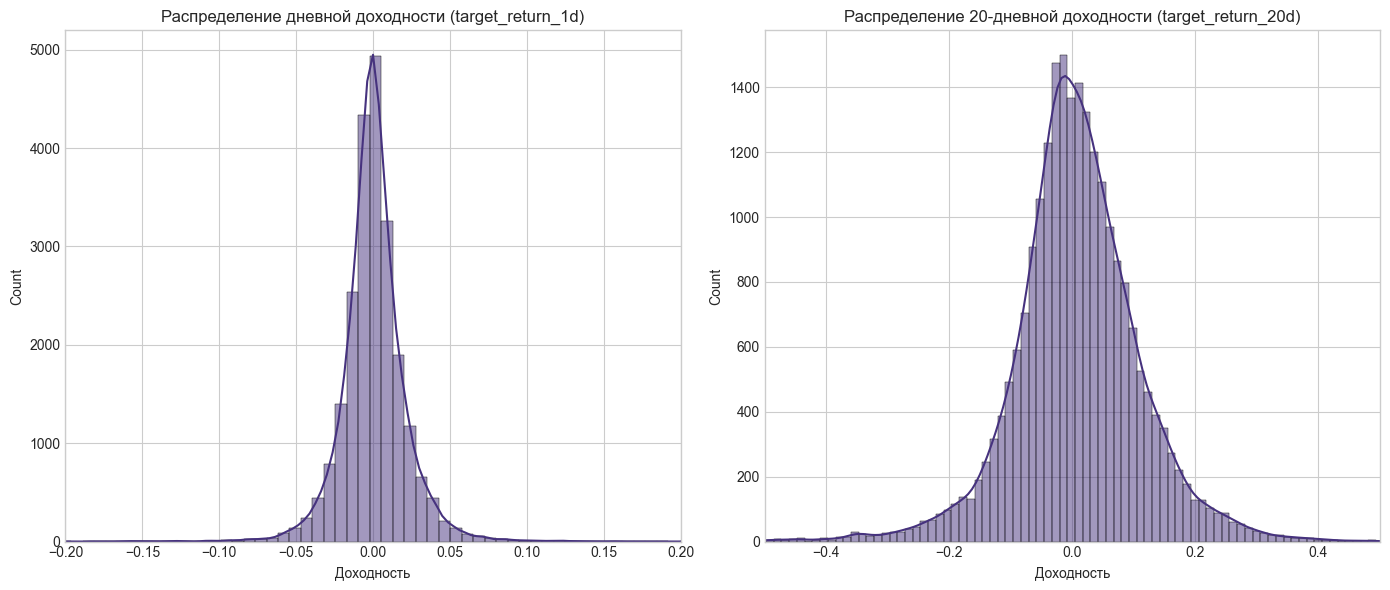

In [6]:
plt.figure(figsize=(14, 6))

# Распределение дневной доходности
plt.subplot(1, 2, 1)
sns.histplot(df_candles['target_return_1d'], bins=100, kde=True)
plt.title('Распределение дневной доходности (target_return_1d)')
plt.xlabel('Доходность')
# Ограничим x_lim для лучшей визуализации, так как могут быть сильные выбросы
plt.xlim(-0.2, 0.2)


# Распределение 20-дневной доходности
plt.subplot(1, 2, 2)
sns.histplot(df_candles['target_return_20d'], bins=100, kde=True)
plt.title('Распределение 20-дневной доходности (target_return_20d)')
plt.xlabel('Доходность')
plt.xlim(-0.5, 0.5)


plt.tight_layout()
plt.show()

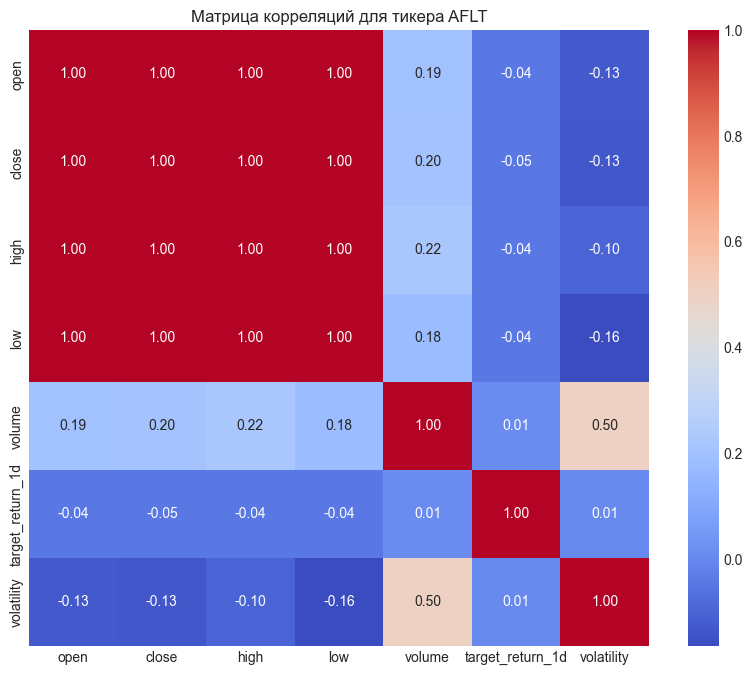

In [7]:
# Выберем один тикер для примера, например, самый популярный
sample_ticker = ticker_history.index[0]
df_sample = df_candles[df_candles['ticker'] == sample_ticker].copy()

# Рассчитаем дневную волатильность как (high - low) / close
df_sample['volatility'] = (df_sample['high'] - df_sample['low']) / df_sample['close']

corr_cols = ['open', 'close', 'high', 'low', 'volume', 'target_return_1d', 'volatility']

correlation_matrix = df_sample[corr_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title(f'Матрица корреляций для тикера {sample_ticker}')
plt.show()